In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


<Axes: >

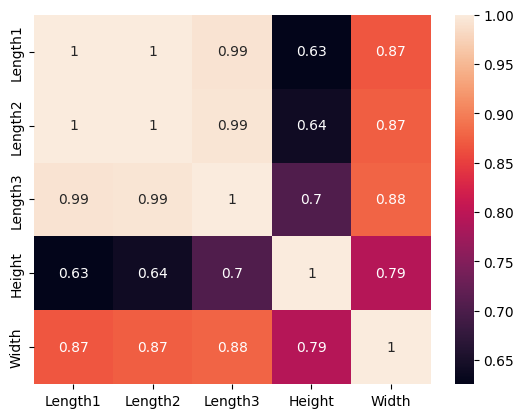

In [30]:
sns.heatmap(X.corr(),annot=True)

In [3]:
df.shape

(159, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [5]:
X=df.drop(['Species','Weight'],axis=1)
y=df['Weight']

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [8]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [8]:
linear=LinearRegression()
linear.fit(X_train,y_train)


LinearRegression()

In [9]:
pred=linear.predict(X_test)

In [12]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [11]:
r2_score(y_test,pred)

0.8828776020785211

In [12]:
mean_squared_error(y_test,pred)

15271.289203414188

In [13]:
np.sqrt(mean_squared_error(y_test,pred))

123.57705775512778

In [14]:
mean_absolute_error(y_test,pred)

95.36828906864324

In [24]:
ridge=Ridge(alpha=4.99)

In [25]:
ridge.fit(X_train,y_train)

Ridge(alpha=4.99)

In [26]:
pred2=ridge.predict(X_test)

In [27]:
r2_score(y_test,pred2)#88.12888

0.8818795956653845

In [28]:
mean_squared_error(y_test,pred2)#15478

15401.416701077684

In [29]:
mean_absolute_error(y_test,pred2)

95.88357050437514

In [21]:
from sklearn.linear_model import RidgeCV

In [22]:
alphas = [0.01, 0.1, 1.0, 10.0,100,1000] # list of alpha values to try
ridge_cv = RidgeCV(alphas=alphas, cv=5)

# fit the RidgeCV object to the data
ridge_cv.fit(X_train, y_train)

# print the best alpha value
print("Best alpha:", ridge_cv.alpha_)

Best alpha: 10.0


In [3]:
def ridgetune(X_train,y_train):
    from sklearn.linear_model import RidgeCV
    alphas = [0.01, 0.1, 1.0, 10.0,100,1000] # list of alpha values to try
    ridge_cv = RidgeCV(alphas=alphas, cv=5)

    # fit the RidgeCV object to the data
    ridge_cv.fit(X_train, y_train)

    # print the best alpha value
    print("Best alpha:", ridge_cv.alpha_)

In [33]:
Xnew=X.drop(['Length2','Length3'],axis=1)

In [35]:
from sklearn.model_selection import train_test_split
X1_train,X1_test,y1_train,y1_test=train_test_split(Xnew,y,test_size=0.25,random_state=42)

In [36]:
ridge.fit(X1_train,y1_train)

Ridge(alpha=4.99)

In [37]:
pred3=ridge.predict(X1_test)

In [38]:
r2_score(y1_test,pred3)

0.8799867050984944

In [44]:
mean_squared_error(y1_test,pred3)

15648.22584937375

In [39]:
linear.fit(X1_train,y1_train)

LinearRegression()

In [41]:
pred4=linear.predict(X1_test)

In [42]:
r2_score(y1_test,pred4)

0.8802051787716441

In [43]:
mean_squared_error(y1_test,pred4)

15619.739627223176

In [73]:
lasso=Lasso(alpha=0.1)

In [74]:
lasso.fit(X1_train,y1_train)

Lasso(alpha=0.1)

In [75]:
pred5=lasso.predict(X1_test)

In [76]:
r2_score(y1_test,pred5)

0.8801858615425525

In [77]:
mean_squared_error(y1_test,pred5)

15622.258351201686

In [78]:
mean_absolute_error(y1_test,pred5)

96.79862654255741

In [15]:
def lassotune(X_train,y_train):
    from sklearn.linear_model import LassoCV
    alphas = [0.01, 0.1, 1.0, 10.0,100,1000] # list of alpha values to try
    lasso_cv = LassoCV(alphas=alphas, cv=5)

    # fit the RidgeCV object to the data
    lasso_cv.fit(X_train,y_train)

    # print the best alpha value
    print("Best alpha:", lasso_cv.alpha_)

In [104]:
df1=pd.read_csv('auto-mpg.csv')
df1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [105]:
df1.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [106]:
df1['model year'].unique()


array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)

In [107]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df1['model year']=LabelEncoder().fit_transform(df1['model year'])
df1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,0,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,0,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,0,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,0,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,0,1,ford torino


In [108]:
X=df1.drop(['car name','mpg'],axis=1)
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130,3504,12.0,0,1
1,8,350.0,165,3693,11.5,0,1
2,8,318.0,150,3436,11.0,0,1
3,8,304.0,150,3433,12.0,0,1
4,8,302.0,140,3449,10.5,0,1


In [109]:
Y=df1['mpg']

<Axes: >

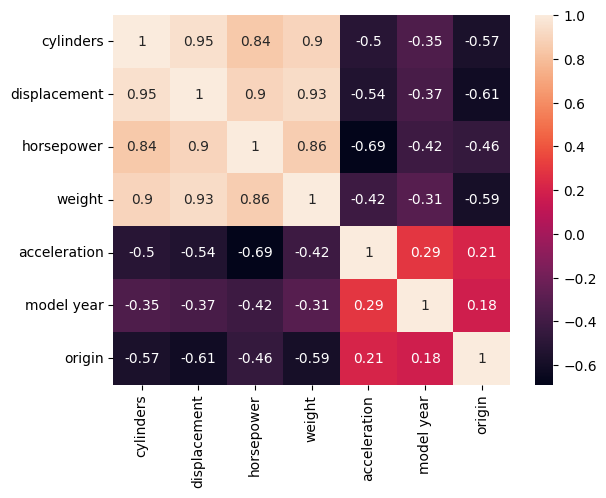

In [110]:
sns.heatmap(X.corr(),annot=True)

In [114]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [115]:
linear.fit(X_train,y_train)

LinearRegression()

In [116]:
pred_mpg1=linear.predict(X_test)

In [117]:
r2_score(y_test,pred_mpg1)

0.7988908872869827

In [130]:
alphas = [0.01, 0.1, 1.0, 10.0,100,1000] # list of alpha values to try
lasso_cv = LassoCV(alphas=alphas, cv=5)

# fit the RidgeCV object to the data
lasso_cv.fit(X_train,y_train)

# print the best alpha value
print("Best alpha:", lasso_cv.alpha_)

Best alpha: 0.1


In [131]:
lasso=Lasso(alpha=0.1)

In [132]:
lasso.fit(X_train,y_train)


Lasso(alpha=0.1)

In [133]:
pred_mpg2=lasso.predict(X_test)

In [134]:
r2_score(y_test,pred_mpg2)

0.7976667768749912

In [135]:
  alphas = [0.01, 0.1, 1.0, 10.0,100,1000] # list of alpha values to try
ridge_cv = RidgeCV(alphas=alphas, cv=5)

# fit the RidgeCV object to the data
ridge_cv.fit(X_train,y_train)

# print the best alpha value
print("Best alpha:", ridge_cv.alpha_)

Best alpha: 10.0


In [136]:
ridge=Ridge(alpha=10)
ridge.fit(X_train,y_train)

Ridge(alpha=10)

In [138]:
pred_mpg3=ridge.predict(X_test)

In [139]:
r2_score(y_test,pred_mpg3)

0.800012185707668

### California Dataset

In [4]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
X=pd.DataFrame(california.data,columns=california.feature_names)
y=california.target

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [6]:
ridgetune(X_train,y_train)

Best alpha: 100.0


In [10]:
ridge=Ridge(alpha=100)
ridge.fit(X_train,y_train)

Ridge(alpha=100)

In [11]:
pridge_cal=ridge.predict(X_test)

In [13]:
r2_score(y_test,pridge_cal)

0.5902139854822979

In [16]:
lassotune(X_train,y_train)

Best alpha: 0.01


In [17]:
lasso=Lasso(alpha=0.01)
lasso.fit(X_train,y_train)

Lasso(alpha=0.01)

In [18]:
plasso_cal=lasso.predict(X_test)

In [19]:
r2_score(y_test,plasso_cal)

0.5855078217958598